In [42]:
# librerias
import numpy as np
import pandas as pd

#cargas datos
datos = pd.read_csv('Social_Network_Ads.csv')

# Exploracion de datos
type(datos)
datos.head()
datos.info()
datos.describe().transpose()

#Conjunto de datos de entrada y salida
x = datos.iloc[:, [2,3]].values
y = datos.iloc[:, 4].values


from sklearn.preprocessing import StandardScaler
esc = StandardScaler()
x = esc.fit_transform(x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [44]:
print(f"Escala edad: [{x[0].min():.2f} , {x[0].max():.2f}]")
print(f"Escala salario: [{x[1].min():.2f} , {x[1].max():.2f}]")

Escala edad: [-1.78 , -1.49]
Escala salario: [-1.46 , -0.25]


In [49]:
#Entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x_train, y_train)

#Lanzamos la prediccion
y_pred = log.predict(x_test)

In [46]:
# Importamos las funciones que vamos a necesitar
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Evaluar el rendimeiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Impripmir metricas de rendimineto
print(f'Precision del modelo: {accuracy:.2f}')
print('\nMatriz de  confusion:\n', conf_matrix)
print('\n Reporte de clasificacion:\n', classification_rep)


Precision del modelo: 0.83

Matriz de  confusion:
 [[52  6]
 [11 31]]

 Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.84      0.74      0.78        42

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



In [47]:
x_set, y_set = x_train, y_train

coord_x = np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01)
coord_y = np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)

print(f"cord_x: start {x_set[:, 0].min() - 1} stop {x_set[:, 0].max() + 1}")
print(f"cord_y: start {x_set[:, 1].min() - 1} stop {x_set[:, 1].max() + 1}")



cord_x: start -2.877310557833164 stop 3.134240875847471
cord_y: start -2.6075056615492507 stop 3.1805608377858787


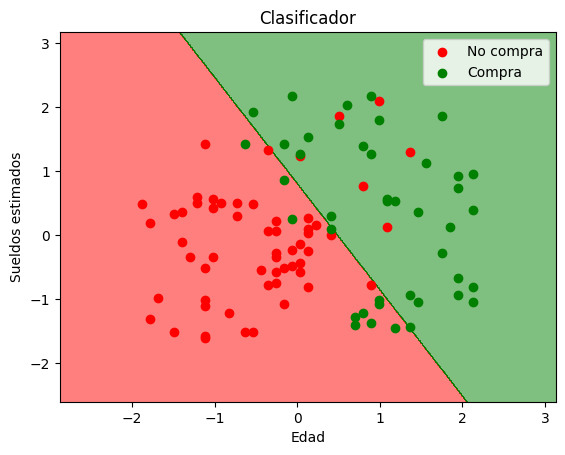

In [48]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

#La funcion meshgrid() toma dos o mas vectores unidimensionales y genera matrices 2D que representan todas las
# combinaciones posibles de pares de puntos entre esos vectores
xx, yy = np.meshgrid(coord_x, coord_y)

#Dibujamos las predicciones para todos los puntos (xx, yy) 
plt.contourf(xx, yy,
            log.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
            alpha = 0.50,
            cmap = ListedColormap(('red', 'green')))

etiquetas = ['No compra', 'Compra']
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(), yy.max())


for i, j in enumerate(np.unique(y_set)):
    #Dibujamos todo slos puntos para las salidas 0 y 1
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
    color = ListedColormap(('red','green'))(i), label = etiquetas[j])

plt.title('Clasificador')
plt.xlabel('Edad')
plt.ylabel('Sueldos estimados')
plt.legend()
plt.show()